<a href="https://colab.research.google.com/github/Br0d0brey/GoogleColabFiles/blob/main/laba_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Fashion-MNIST - это набор данных изображений статей Zalando, состоящий из обучающего набора из 60 000 примеров и тестового набора из 10 000 примеров. Каждый пример представляет собой изображение в оттенках серого 28x28, связанное с меткой из 10 классов.

Керас ожидает такого формата данных:(n_samples, height, width, channels). Нужно добавить дополнительное измерение, для этого изменить свой тренировочный набор с помощью .reshape (n_images, высота, ширина, каналы). Т.к. у меня зображения в оттенках серого, у них есть 1 канал, поэтому они должны быть переданы Keras в следующем формате: (60 000, 28, 28, 1)

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

**Проверим данные**

Чтобы убедиться, что набор данных выглядит правильно, давайте построим первые 25 изображений из обучающего набора и отобразим имя класса под каждым изображением:

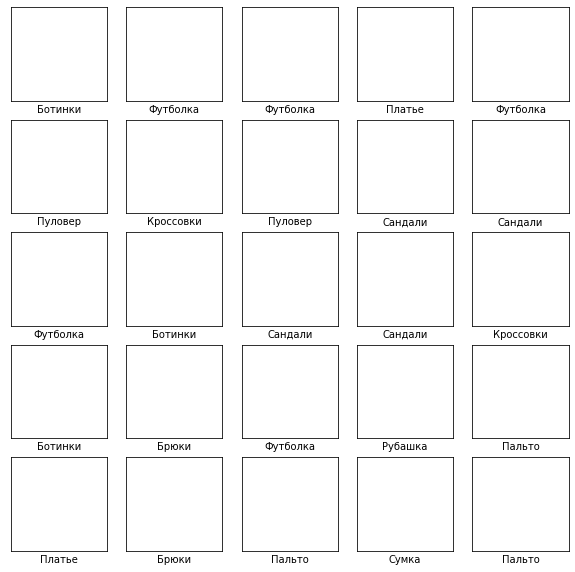

In [8]:
class_names = ["Футболка", "Брюки", "Пуловер", "Платье", "Пальто",
                "Сандали", "Рубашка", "Кроссовки", "Сумка", "Ботинки"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Создам сверточную базу

Настраивается CNN для обработки входных данных размера (28, 28, 1), которая является форматом изображений fashion_mnist. 

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(Dropout(0.5))

Посмотрим архитектуру модели:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

Добавление полносвязных слоев

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Полная архитектура модели:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Сводка сети показывает, что выходы (3, 3, 64) были сглажены в векторы размера (576) перед прохождением через два полносвязных слоя.

# Компилирование и обучение модели

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5000 - accuracy: 0.8174 - val_loss: 0.3664 - val_accuracy: 0.8719
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3229 - accuracy: 0.8823 - val_loss: 0.3355 - val_accuracy: 0.8780
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2775 - accuracy: 0.8978 - val_loss: 0.2992 - val_accuracy: 0.8900
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2469 - accuracy: 0.9092 - val_loss: 0.2712 - val_accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.2221 - accuracy: 0.9185 - val_loss: 0.2677 - val_accuracy: 0.9022
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2021 - accuracy: 0.9252 - val_loss: 0.2636 - val_accuracy: 0.9056
Epoch 7/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.1848 - accuracy: 0.9303 - val_loss: 0.2660 -

**CNN достигла точности на тестовой выборке более 90%:**

In [ ]:
print(test_acc)

NameError: ignored

313/313 - 2s - loss: 0.2813 - accuracy: 0.9091 - 2s/epoch - 7ms/step


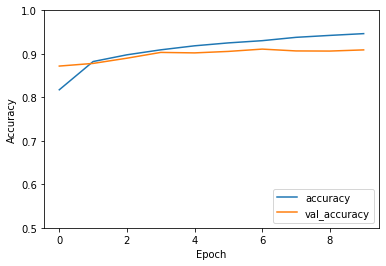

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)